# **개요**

게임회사 데이터를 이용하여 다음분기에 출시할 게임 설계하기

# **목차**

1. 데이터 설명

2. EDA

3. PCA

4. 지역에 따라서 선호하는 게임 장르의 유무 분석

5. 연도별 게임의 트렌드 알아보기

6. 최근에 인기가 많은 게임에 대한 분석

7. 협업할 게임회사(배급사) 찾고 분석하기

8. 결론

# **Part1. 데이터 설명**

경동연님은 게임 회사의 데이터 팀에 합류했습니다.

다음 분기에 어떤 게임을 설계해야 할까

라는 고민을 해결하기 위해, 기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 합니다.

Name : 게임의 이름입니다.

Platform : 게임이 지원되는 플랫폼의 이름입니다.

Year : 게임이 출시된 연도입니다.

Genre : 게임의 장르입니다.

Publisher : 게임을 배급한 회사입니다.

NA_Sales : 북미지역에서의 출고량입니다.

EU_Sales : 유럽지역에서의 출고량입니다.

JP_Sales : 일본지역에서의 출고량입니다.

Other_Sales : 기타지역에서의 출고량입니다.

In [2]:
import pandas as pd #dataframe을 이용 -> 데이터를 분석하고 의미도출
import numpy as np # numeric computation 수학적 계산
import matplotlib.pyplot as plt # visualization 시각화
import seaborn as sns
import math
import random
import scipy.stats as stats # 가설검정

# KMeans 클러스터
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# hierarchy 클러스터
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [3]:
# 업로드를 통해 파일 불러오기
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [76]:
# 파일 업로드 후 
df = pd.read_csv('vgames2.csv')

In [53]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_by_region
16,Rise of Nations,PC,2003,Strategy,Microsoft Game Studios,10000.0,20000.0,0.0,10000.0,40000.0
19,Tropico Reloaded,PC,2009,Strategy,Kalypso Media,0.0,20000.0,0.0,0.0,20000.0
35,Advance Wars: Dual Strike,DS,2005,Strategy,Nintendo,300000.0,30000.0,40000.0,30000.0,400000.0
40,Knights of Honor,PC,2004,Strategy,Sunflowers,0.0,20000.0,0.0,10000.0,30000.0
68,Command & Conquer,N64,1999,Strategy,Nintendo,220000.0,50000.0,0.0,0.0,270000.0


# **Part 2. EDA**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [6]:
# 중복값 없음
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [77]:
#데이터프레임으로 만듬
vgames2 = pd.DataFrame(data = df, columns=['Unnamed: 0', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
vgames2

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [78]:
# 필요없는 Unnamed: 0 칼럼 drop
vgames2 = vgames2.drop(['Unnamed: 0'], axis = 'columns')

In [23]:
vgames2.duplicated().sum()

1

In [79]:
vgames2 = vgames2.drop_duplicates()

In [25]:
test = vgames2[vgames2['Year'].isnull()]
test

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
430,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
...,...,...,...,...,...,...,...,...,...
16240,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16275,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16278,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0


In [67]:
# 같은게임에 연도가 하나라도 적혀 있으면 연도 결측치를 중앙값으로 대체
#vgames2['Year'].fillna(vgames2.groupby('Name')['Year'].transform('median'), inplace = True)

In [80]:
#게임 종류가 다양하고(게임 이름이 너무 다양함) 데이터 개수가 16598로 충분하므로 나머지 결측값은 제거하고 진행
vgames2 = vgames2.dropna(axis=0)

In [81]:
vgames2 = vgames2.reset_index(drop=True)
vgames2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [28]:
vgames2.iloc[7017]

Name                         Bushido Blade
Platform                                PS
Year                                1997.0
Genre                             Fighting
Publisher      Sony Computer Entertainment
NA_Sales                              0.39
EU_Sales                              0.27
JP_Sales                              0.43
Other_Sales                            80K
Name: 7017, dtype: object

In [29]:
vgames2[vgames2['EU_Sales'].str.contains('M')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06
35,Advance Wars: Dual Strike,DS,2005.0,Strategy,Nintendo,0.3,0.03M,0.04,0.03
173,Max Payne,GBA,2003.0,Shooter,Take-Two Interactive,0.02,0.01M,0,0
214,MotoGP '06,X360,2006.0,Racing,THQ,0.11,0.01M,0,0.01
452,Spider-Man: The Movie,GC,2002.0,Action,Activision,0.86,0.27M,0.01,0.04
...,...,...,...,...,...,...,...,...,...
15817,My Spanish Coach,DS,2007.0,Misc,Ubisoft,0.4,0.01M,0,0.03
15918,Shellshock: Nam '67,XB,2004.0,Shooter,Eidos Interactive,0.16,0.05M,0,0.01
15995,Aladdin Magic Racer,Wii,2011.0,Racing,Big Ben Interactive,0.01,0M,0,0
16032,Tomb Raider: Underworld,PS2,2009.0,Action,Eidos Interactive,0.09,0.04M,0,0.05


출고량에 있는 영어 단위인 K(kilo)는 1000을 M(million) 백만을 곱해주어야 한다.

문제는 비율로 나타난 다른 값들인데 예시를 보면
Bushido Blade의 경우 일본에서 43만장이 팔렸는데 0.43으로 표시 되어 있다.

즉 소수점으로 된 값들에는 백만을 곱해주면 되는 것을 알 수 있다

In [82]:
#출고량 칼럼의 값을 단위변환 하는 함수 

def Unit_Conversion(ch):
    if 'K' in ch:
        ch = ch[:len(ch)-1]
        ch = float(ch)*1000
    elif 'M' in ch:
        ch = ch[:len(ch)-1]
        ch = float(ch)*1000000
    else:
        ch = float(ch)*1000000
    return ch

for col in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
    vgames2[col] = vgames2[col].apply(Unit_Conversion)

In [83]:
vgames2.Year = vgames2.Year.astype(str).str[:-2]
vgames2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000.0,0.0,0.0,0.0
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0


In [84]:
vgames2 = vgames2.astype({'Year':'int'})

In [33]:
vgames2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


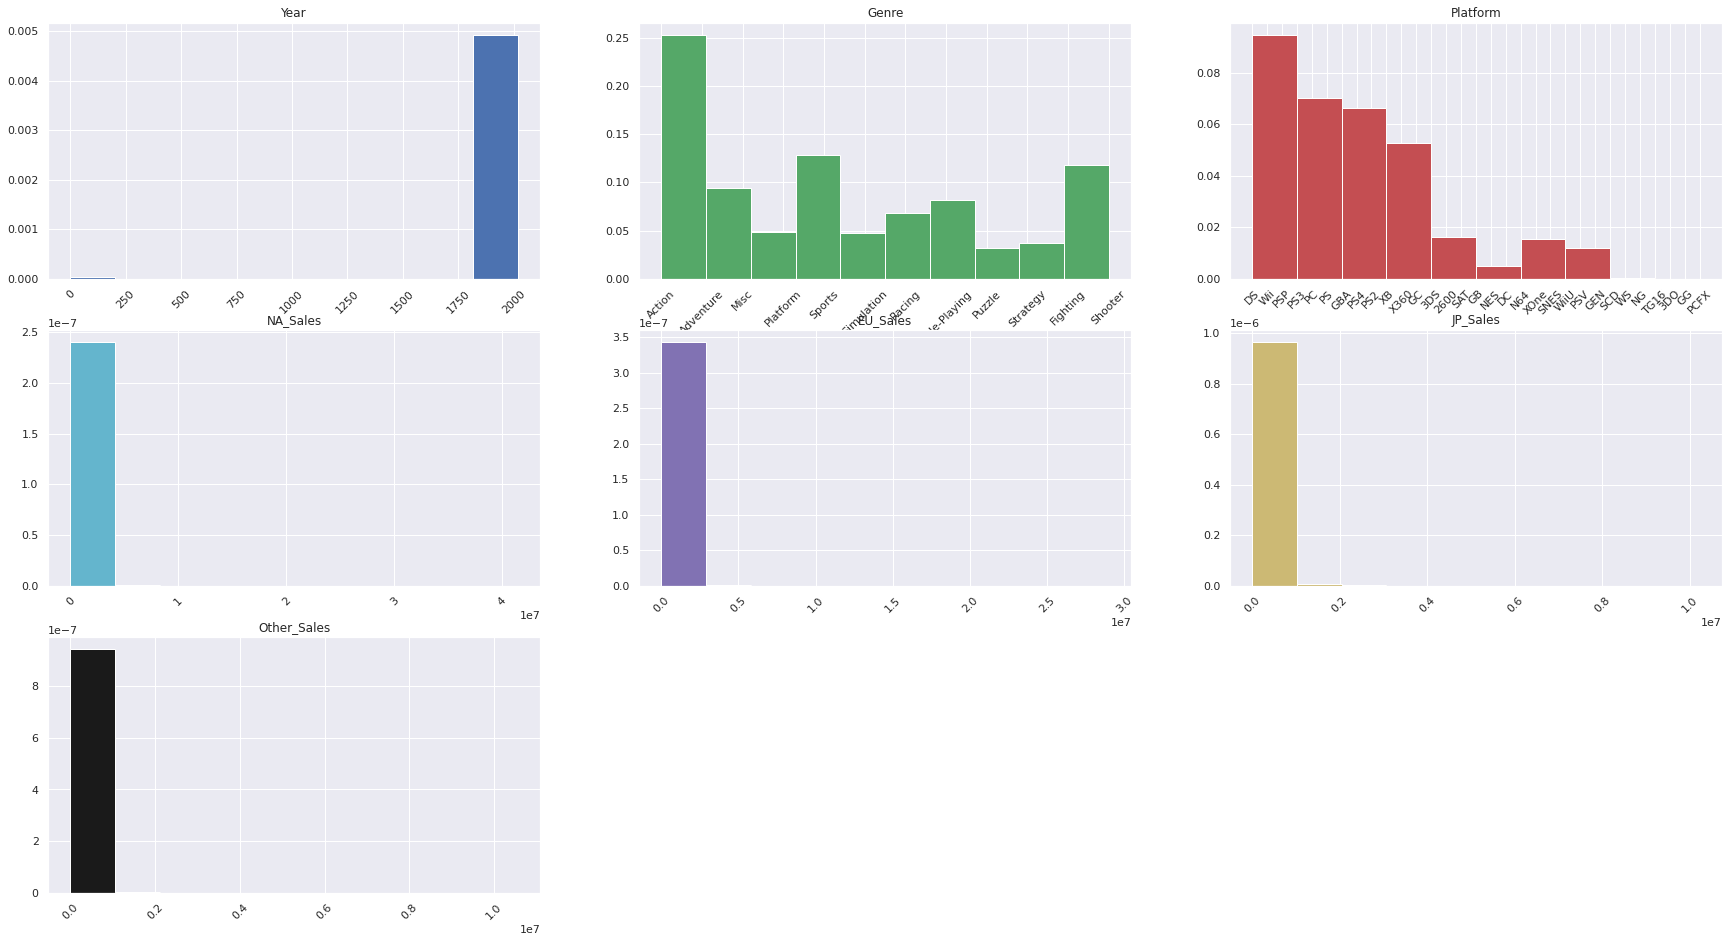

In [85]:
ytl=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

plt.figure(figsize = (30,16))

for i, col in enumerate(['Year', 'Genre', 'Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']):
    plt.subplot(3,3,i+1)

    plt.hist(vgames2[col], density=True, color=ytl[i])

    plt.title(col)
    plt.xticks(rotation=45) #반시계방향으로 x축 레이블을 45도 회전시켜서 나타내라는 의미
    plt.grid(True) # 격자 생성
    #plt.grid(True, axis='y') #가로방향 격자 생성
plt.show()

Year 칼럼에서 이상치 데이터들 발견

비디오 게임은 1952년에 서양의 오목이라 불리는 놀이인 틱택토를 컴퓨터로 표현한 '삼목놓기(Noughts and Crosses)가 제작되며 역사가 시작 되었는데 
0~250년 사이에 데이터가 있는 이상치를 확인하게 되었습니다.

In [35]:
#Year 데이터의 이상형태확인
print('Year 한자리인 이상치 개수: ', len(vgames2[vgames2['Year'].apply(lambda x : len(str(int(x))) == 1)]))

print('Year 두자리인 이상치 개수: ', len(vgames2[vgames2['Year'].apply(lambda x : len(str(int(x))) == 2)]))


Year 한자리인 이상치 개수:  53
Year 두자리인 이상치 개수:  47


Year 한자리인 이상치 개수:  0
Year 두자리인 이상치 개수:  0


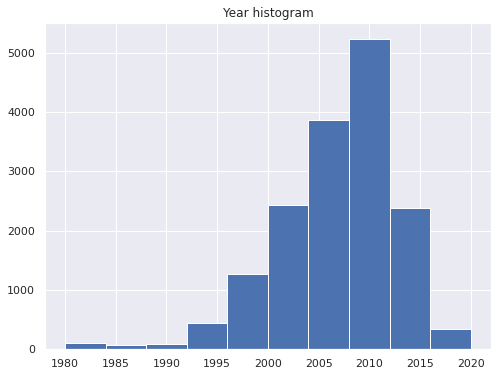

In [86]:
#Year 이상치 처리

def pre_year(x):
    if len(str(int(x))) == 1:
        x = x+2000
    elif len(str(int(x))) == 2:
        if int(x) <= 22:
            x = x+2000
        else:
            x = x+1900
    return x

vgames2['Year'] = vgames2['Year'].apply(pre_year)

#이상치 확인
print('Year 한자리인 이상치 개수: ', len(vgames2[vgames2['Year'].apply(lambda x : len(str(int(x))) == 1)]))
print('Year 두자리인 이상치 개수: ', len(vgames2[vgames2['Year'].apply(lambda x : len(str(int(x))) == 2)]))

plt.figure(figsize = (8,6))

#Year 확인
plt.hist(vgames2['Year'])
plt.title('Year histogram')
plt.show()

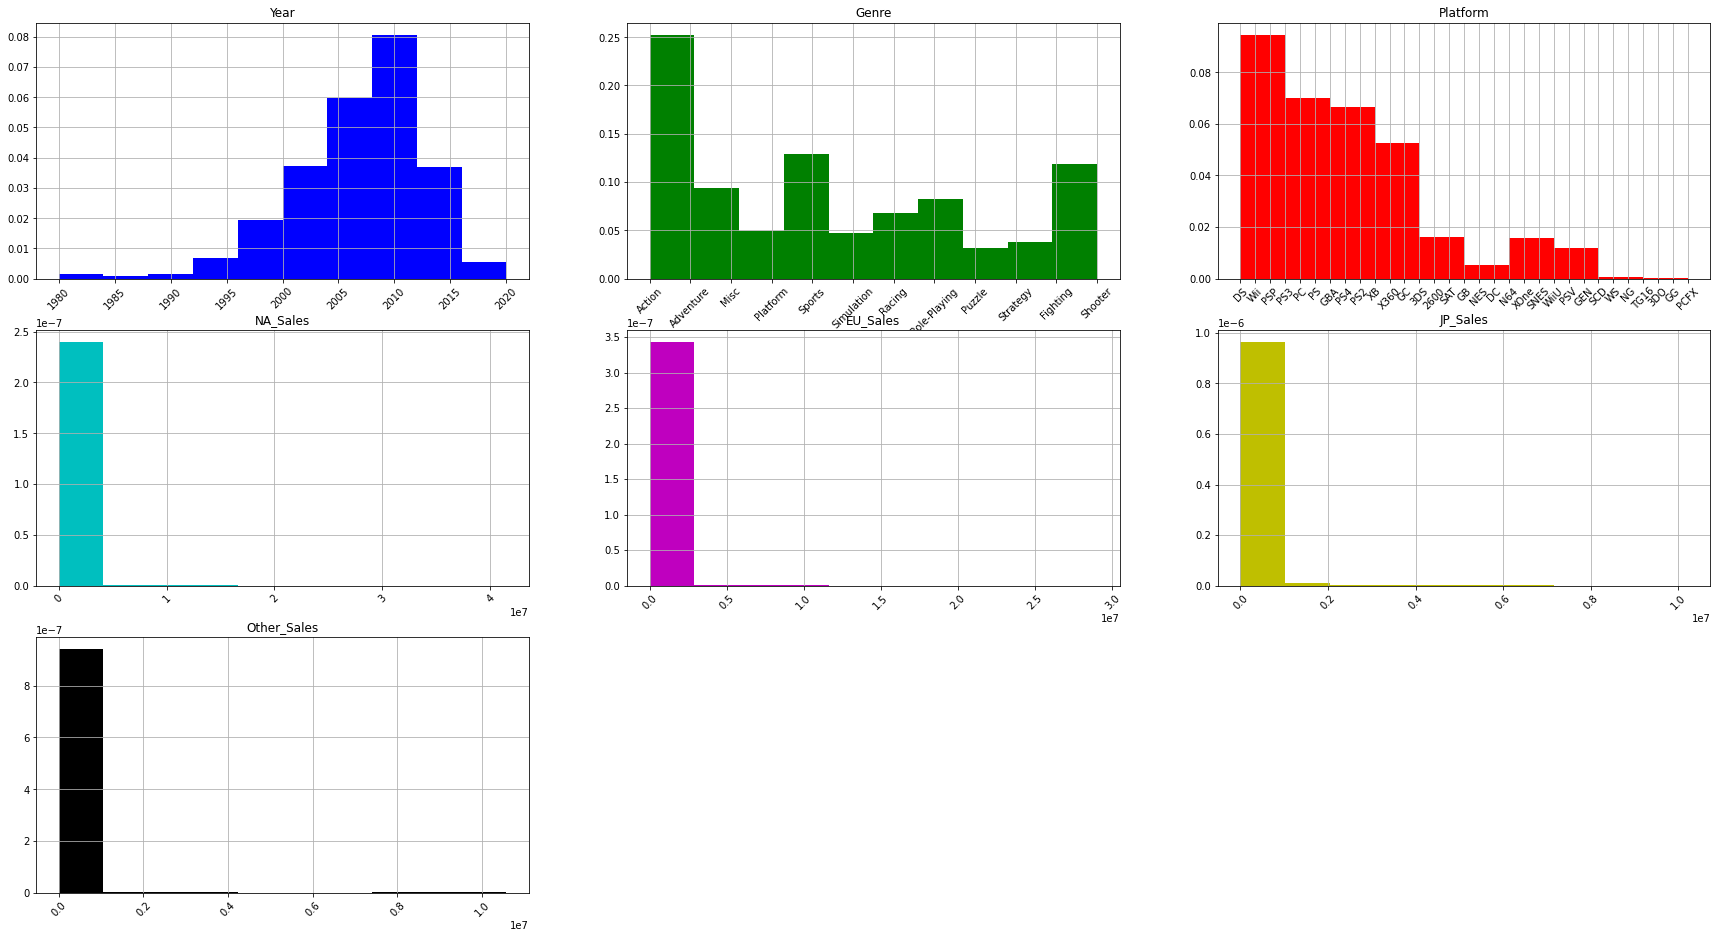

In [37]:
ytl=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

plt.figure(figsize = (30,16))

for i, col in enumerate(['Year', 'Genre', 'Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']):
    plt.subplot(3,3,i+1)

    plt.hist(vgames2[col], density=True, color=ytl[i])

    plt.title(col)
    plt.xticks(rotation=45) #반시계방향으로 x축 레이블을 45도 회전시켜서 나타내라는 의미
    plt.grid(True) # 격자 생성
    #plt.grid(True, axis='y') #가로방향 격자 생성
plt.show()

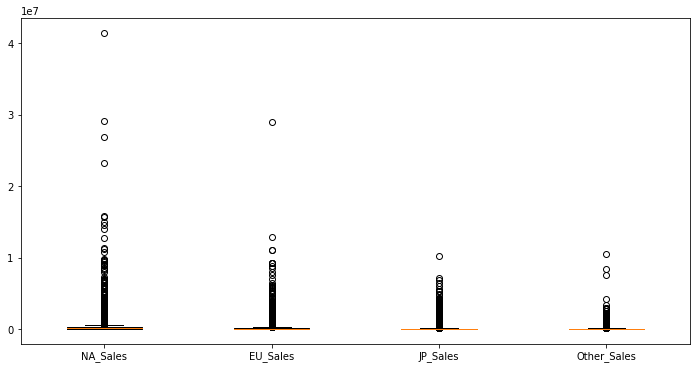

In [38]:
#boxplot으로 출고량들의 분포확인

plt.figure(figsize=(12,6))
plt.boxplot([vgames2['NA_Sales'],vgames2['EU_Sales'],vgames2['JP_Sales'],vgames2['Other_Sales']])
plt.xticks([1, 2, 3, 4], ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.show()

출고량 데이터에서 분포를 크게 벗어난 값들은 이상치가 아니라 
Wii 스포츠, 슈퍼마리오, 테트리스, 마리오 키트 같은 인기가 많아서 잘 팔린 게임들이기 때문에 삭제하지 않는다.

# **Part 3. PCA**

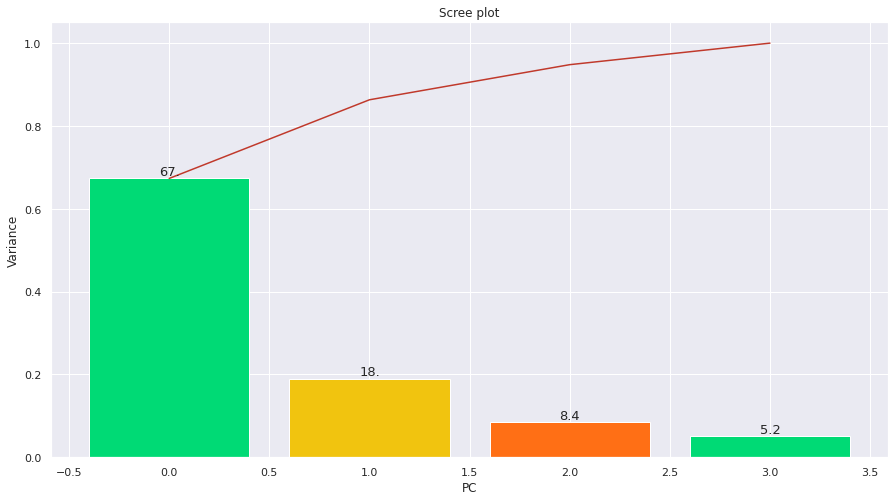

In [87]:
shipment_volume_data = vgames2[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
other_data = vgames2[['Name',	'Platform',	'Year',	'Genre',	'Publisher']]

from sklearn.preprocessing import StandardScaler

z = StandardScaler().fit_transform(shipment_volume_data)

import pandas as pd
from sklearn.decomposition import PCA

pca = PCA().fit(z)

import matplotlib.pyplot as plt

def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')

scree_plot(pca)

In [29]:
# PCA는 2~3개 정도 쓰는 것이 적절

In [40]:
pca.explained_variance_ratio_

array([0.67331902, 0.18988961, 0.08478029, 0.05201108])

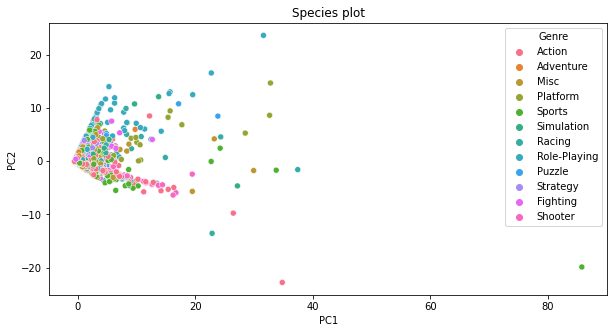

In [43]:
#pca_pred로 pca를 넣은 데이터 프레임을 만들고 Genre의 산점도로 출력
B = pca.transform(z)

pca_pred = pd.DataFrame(B)
pca_pred = pd.concat([pca_pred, other_data['Genre']], axis = 1)
pca_pred

import seaborn as sns
plt.figure(figsize=(10, 5))
sns.scatterplot(data=pca_pred, x=pca_pred[0], y=pca_pred[1], hue='Genre')
# hue_order = ['Adelie', 'Chinstrap', 'Gentoo']

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title('Species plot')
plt.show()

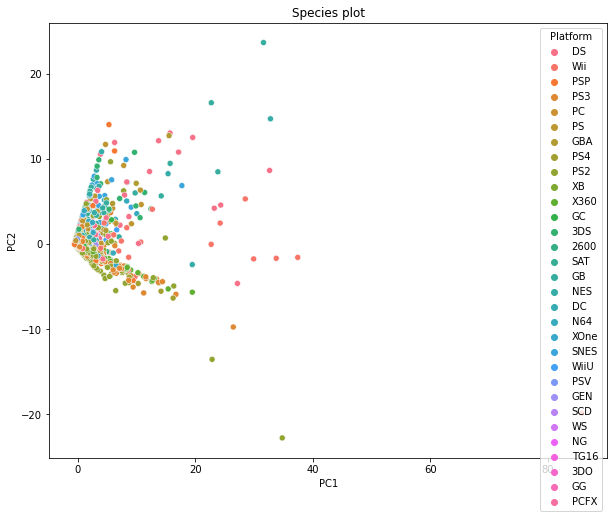

In [44]:
#pca_pred로 pca를 넣은 데이터 프레임을 만들고 Platform의 산점도로 출력
B = pca.transform(z)

pca_pred = pd.DataFrame(B)
pca_pred = pd.concat([pca_pred, other_data['Platform']], axis = 1)
pca_pred

import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_pred, x=pca_pred[0], y=pca_pred[1], hue='Platform')
# hue_order = ['Adelie', 'Chinstrap', 'Gentoo']

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title('Species plot')
plt.show()

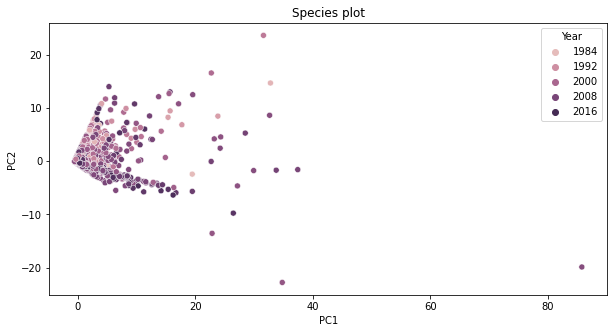

In [45]:
#pca_pred로 pca를 넣은 데이터 프레임을 만들고 산점도로 출력
B = pca.transform(z)

pca_pred = pd.DataFrame(B)
pca_pred = pd.concat([pca_pred, other_data['Year']], axis = 1)
pca_pred

import seaborn as sns
plt.figure(figsize=(10, 5))
sns.scatterplot(data=pca_pred, x=pca_pred[0], y=pca_pred[1], hue='Year')
# hue_order = ['Adelie', 'Chinstrap', 'Gentoo']

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title('Species plot')
plt.show()

In [34]:
"""
PCA 2개를 이용하여플랫폼, 장르, 연도를 PCA를 이용한 산점도를 출력해 보았지만 
그룹별 데이터 분포가 너무 모여있어서 데이터 그룹들이 비슷한 특징을 가진다는 것을 알 수 있었습니다.
"""

'\n플랫폼, 장르, 연도를 PCA를 이용한 산점도를 그려봤지만 분포가 너무 모여있어서 분석이 안됨\n'

# **Part 4. 지역에 따라서 선호하는 게임 장르의 유무 분석**

In [88]:
vgames2.sort_values(by='NA_Sales',ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2855,Wii Sports,Wii,2006,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0
4113,Super Mario Bros.,NES,1985,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0
10280,Duck Hunt,NES,1984,Shooter,Nintendo,26930000.0,630000.0,280000.0,470000.0
1187,Tetris,GB,1989,Puzzle,Nintendo,23200000.0,2260000.0,4220000.0,580000.0
12316,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0
...,...,...,...,...,...,...,...,...,...
8432,Card Fight!! Vanguard G: Stride to Victory!!,3DS,2016,Misc,FuRyu,0.0,0.0,40000.0,0.0
8431,Minna no Conveni,DS,2010,Simulation,Taito,0.0,0.0,10000.0,0.0
8430,MotoGP 15,X360,2015,Racing,Milestone S.r.l.,0.0,10000.0,0.0,0.0
8429,Apassionata: Die Galanacht der Pferde,DS,2009,Simulation,RTL,0.0,40000.0,0.0,10000.0


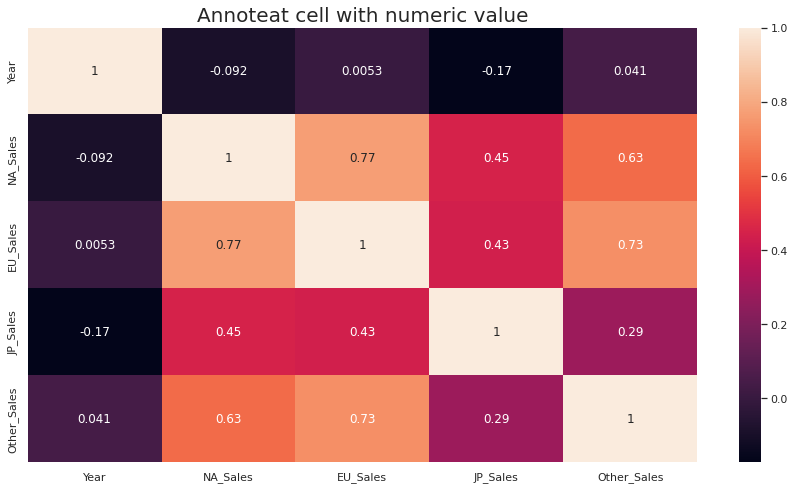

In [89]:
# 상관계수로 숫자 칼럼만 히트맵 그리기
vgames2_corr = vgames2.corr()
vgames2_corr

# annot=True argument를 써서 각 셀에 숫자를 입력(annotate each cell with numeric value)

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(vgames2_corr, annot=True)
plt.title('Annoteat cell with numeric value', fontsize=20)
plt.show()

NA_Sales(북미), EU_Sales(유럽), Other_Sales(기타지역)끼리 서로에게 영향을 끼치고 

JP_Sales(일본) 지역은 다른 지역에 별로 영향을 안 받는 것을 볼 수 있습니다. 

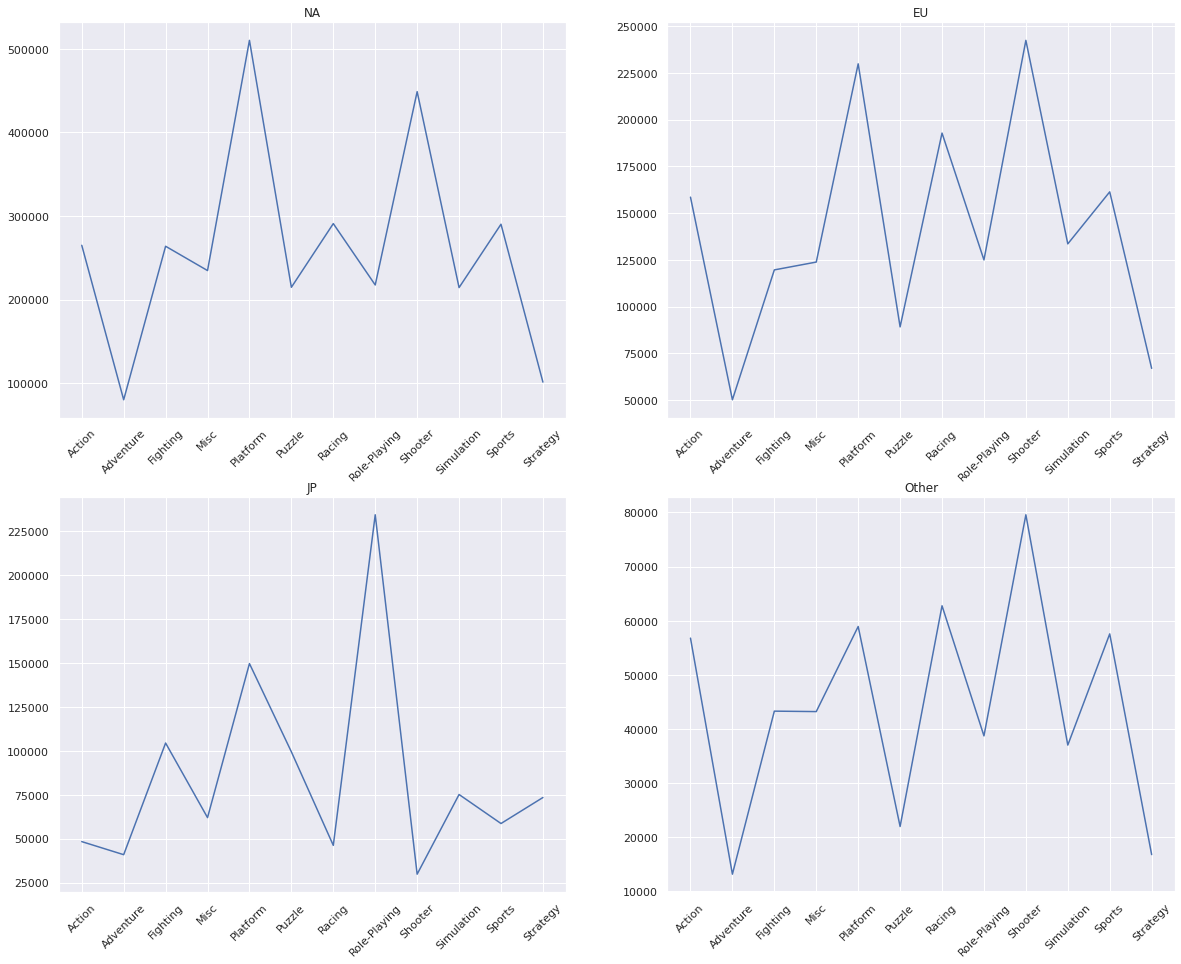

In [90]:
#지역에 따라 선호하는 게임 장르

NA_Sal = vgames2.groupby('Genre')['NA_Sales'].mean()
EU_Sal = vgames2.groupby('Genre')['EU_Sales'].mean()
JP_Sal = vgames2.groupby('Genre')['JP_Sales'].mean()
Other_Sal = vgames2.groupby('Genre')['Other_Sales'].mean()

"""
# ax 이용 기법
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (16,10))

ax[0,0].plot(NA_Sal)
ax[0,0].set_title('NA')

ax[0,1].plot(EU_Sal)
ax[0,1].set_title('EU')

ax[1,0].plot(JP_Sal)
ax[1,0].set_title('JP')

ax[1,1].plot(Other_Sal)
ax[1,1].set_title('Other')

fig.autofmt_xdate (rotation = 45) #한번에 x축 레이블 돌려주기
plt.show()
"""
plt.figure(figsize=(20,16))

plt.subplot(221)
plt.plot(NA_Sal)
plt.title('NA')
plt.xticks(rotation=45)

plt.subplot(222)
plt.plot(EU_Sal)
plt.title('EU')
plt.xticks(rotation=45)

plt.subplot(223)
plt.plot(JP_Sal)
plt.title('JP')
plt.xticks(rotation=45)

plt.subplot(2,2 ,4)
plt.plot(Other_Sal)
plt.title('Other')
plt.xticks(rotation=45)

plt.show()

지역에 따라서 선호하는 게임 장르를 알아보기 위해 지역의 장르별 출고량 그래프를 출력하였다.

지역은 북미(NA), 유럽(EU), 일본(JP), 나머지 나라(Other)로 구분하였다. 
그래프를 분석하면 북미, 유럽, 나머지 나라의 장르별 출고량은 Platform(ex: 슈퍼마리오 시리즈), Racing, Shooter가 높은 출고량을 기록했고 Action, Racing, Sports도 인기있는 것을 알 수 있다.

또한 북미, 유럽, 나머지 나라의 모든 장르들이 출고량 그래프가 비슷하게 그려지는 것을 알 수 있다.

일본(JP)은 Platform 장르의 출고량은 다른 지역들과 유사하지만
Role-Playing(통칭 RPG) 장르가 가장 출고량이 높고 다른 장르들은 출고량이 많이 떨어지는 다른 지역들과 그래프 패턴 차이가 많이 나는 것을 알 수 있다.

결과적으로 히트맵 분석과 비슷하게 일본 이외에 다른 지역들은 선호하는 게임 장르가 유사하다고 볼 수 있다.

In [98]:
# 지역별 모든 출고량을 합친 Total_by_region
vgames2['Total_by_region'] = vgames2['NA_Sales'] + vgames2['JP_Sales'] + vgames2['EU_Sales'] + vgames2['Other_Sales']

In [99]:
group = vgames2.groupby('Genre')
df_NA = [group['NA_Sales'].sum()[x]/(group['NA_Sales'].sum()).sum() for x in range(0,len(group))] # 북미(NA)출고량중 장르별 출고량 비율
df_EU = [group['EU_Sales'].sum()[x]/(group['EU_Sales'].sum()).sum() for x in range(0,len(group))] # 유럽(EU)출고량중 장르별 출고량 비율
df_JP = [group['JP_Sales'].sum()[x]/(group['JP_Sales'].sum()).sum() for x in range(0,len(group))] # 일본지역(JP) 출고량 중 장르별 출고량 비중
df_Other = [group['Other_Sales'].sum()[x]/(group['Other_Sales'].sum()).sum() for x in range(0,len(group))] # 기타지역(Other)출고량중 장르별 출고량 비율
df_T = [group['Total_by_region'].sum()[x]/(group['Total_by_region'].sum()).sum() for x in range(0,len(group))] # 전세계 출고량중 장르별 출고량 비율

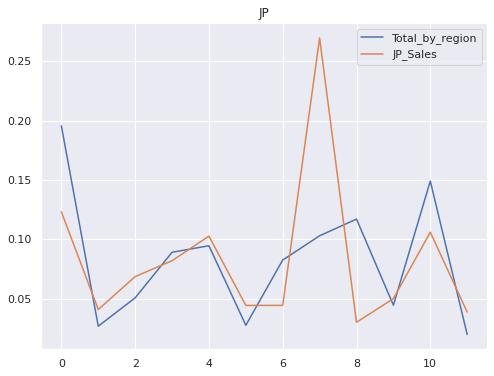

In [100]:
plt.figure(figsize=(8,6))

plt.plot(df_T, label='Total_by_region')
plt.title('Total')

plt.plot(df_JP, label='JP_Sales')
plt.title('JP')

plt.legend()
plt.show()

위 그래프는 일본의 판매량분포(JP_Sales)와 전체 판매량분포(Global_Sales)를 그려보았습니다.

확실히 일본의 롤플레잉(Role-Playing) 장르만 튀어나와있습니다.

이것을 통계적으로도 의미있는 차이인지 가설검정을 해보면 카이제곱분포를 활용하여 적합도 검정(Goodness of fit test)을 해보았습니다.

적합도 검정이란 어떤 표본의 분포가 전체 모집단의 분포와 비슷한지 확인하는 검정방법입니다.

여기에서는 일본의 판매량분포(JP_Sales)와 전체 판매량분포(Global_Sales)가 같은 분포인지 확인해보겠습니다.

귀무가설 : 전체출고량(Global_Sales)의 분포와 일본지역(JP_Sales) 출고량의 분포의 차이가 없다.

대립가설 : 전체출고량(Global_Sales)의 분포와 일본지역(JP_Sales) 출고량의 분포의 차이가 있다.

In [94]:
from scipy.stats import chisquare
chisquare(df_JP,df_T)

Power_divergenceResult(statistic=0.7298204865104398, pvalue=0.999990017975996)

p-value : 0.99로 0.05보다 크므로 이므로 귀무가설을 기각 할 수 없게 된다.

따라서 전체출고량(Global_Sales)의 분포와 일본지역(JP_Sales) 출고량의 분포의 차이가 없습니다.

그래프로 보면 일본에서는 Role-Playing 게임에 선호를 보이는 것으로 나타났으나 카이제곱 적합도 검정을 해보니 통계적으로 유의미한 차이를 보이지 않았습니다.

따라서 지역별로 선호하는 특정 장르는 있지만 ​
전체적인 장르의 선호도 분포는 지역별로 다르지 않다고 생각합니다.

# **Part 5. 연도별 게임의 트렌드 알아보기**

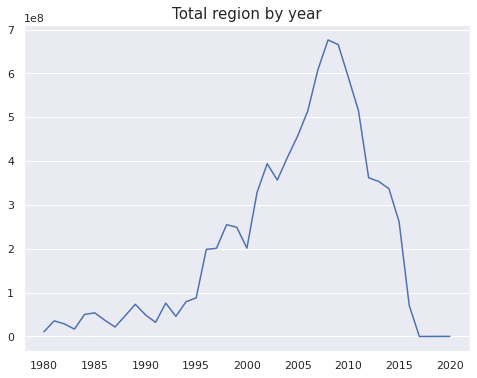

In [53]:
# 연도별 총 출고량 시각화
plt.figure(figsize=(8,6))
plt.plot(vgames2.groupby('Year')['Total_by_region'].sum())
plt.title('Total region by year',fontsize=15)
plt.grid(axis='x')
plt.show()

연도별 총 출고량을 보면 1980년대에 비디오게임이 출시되서 2000년대 까지 점차 성장하고 

2000년에서 2010년까지 급격한 성장세를 보여주고 그 이후 지속적으로 감소한 것을 알 수 있습니다.

In [54]:
ytl=np.array(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'aqua', 'gold', 'coral', 'maroon', 'salmon'])

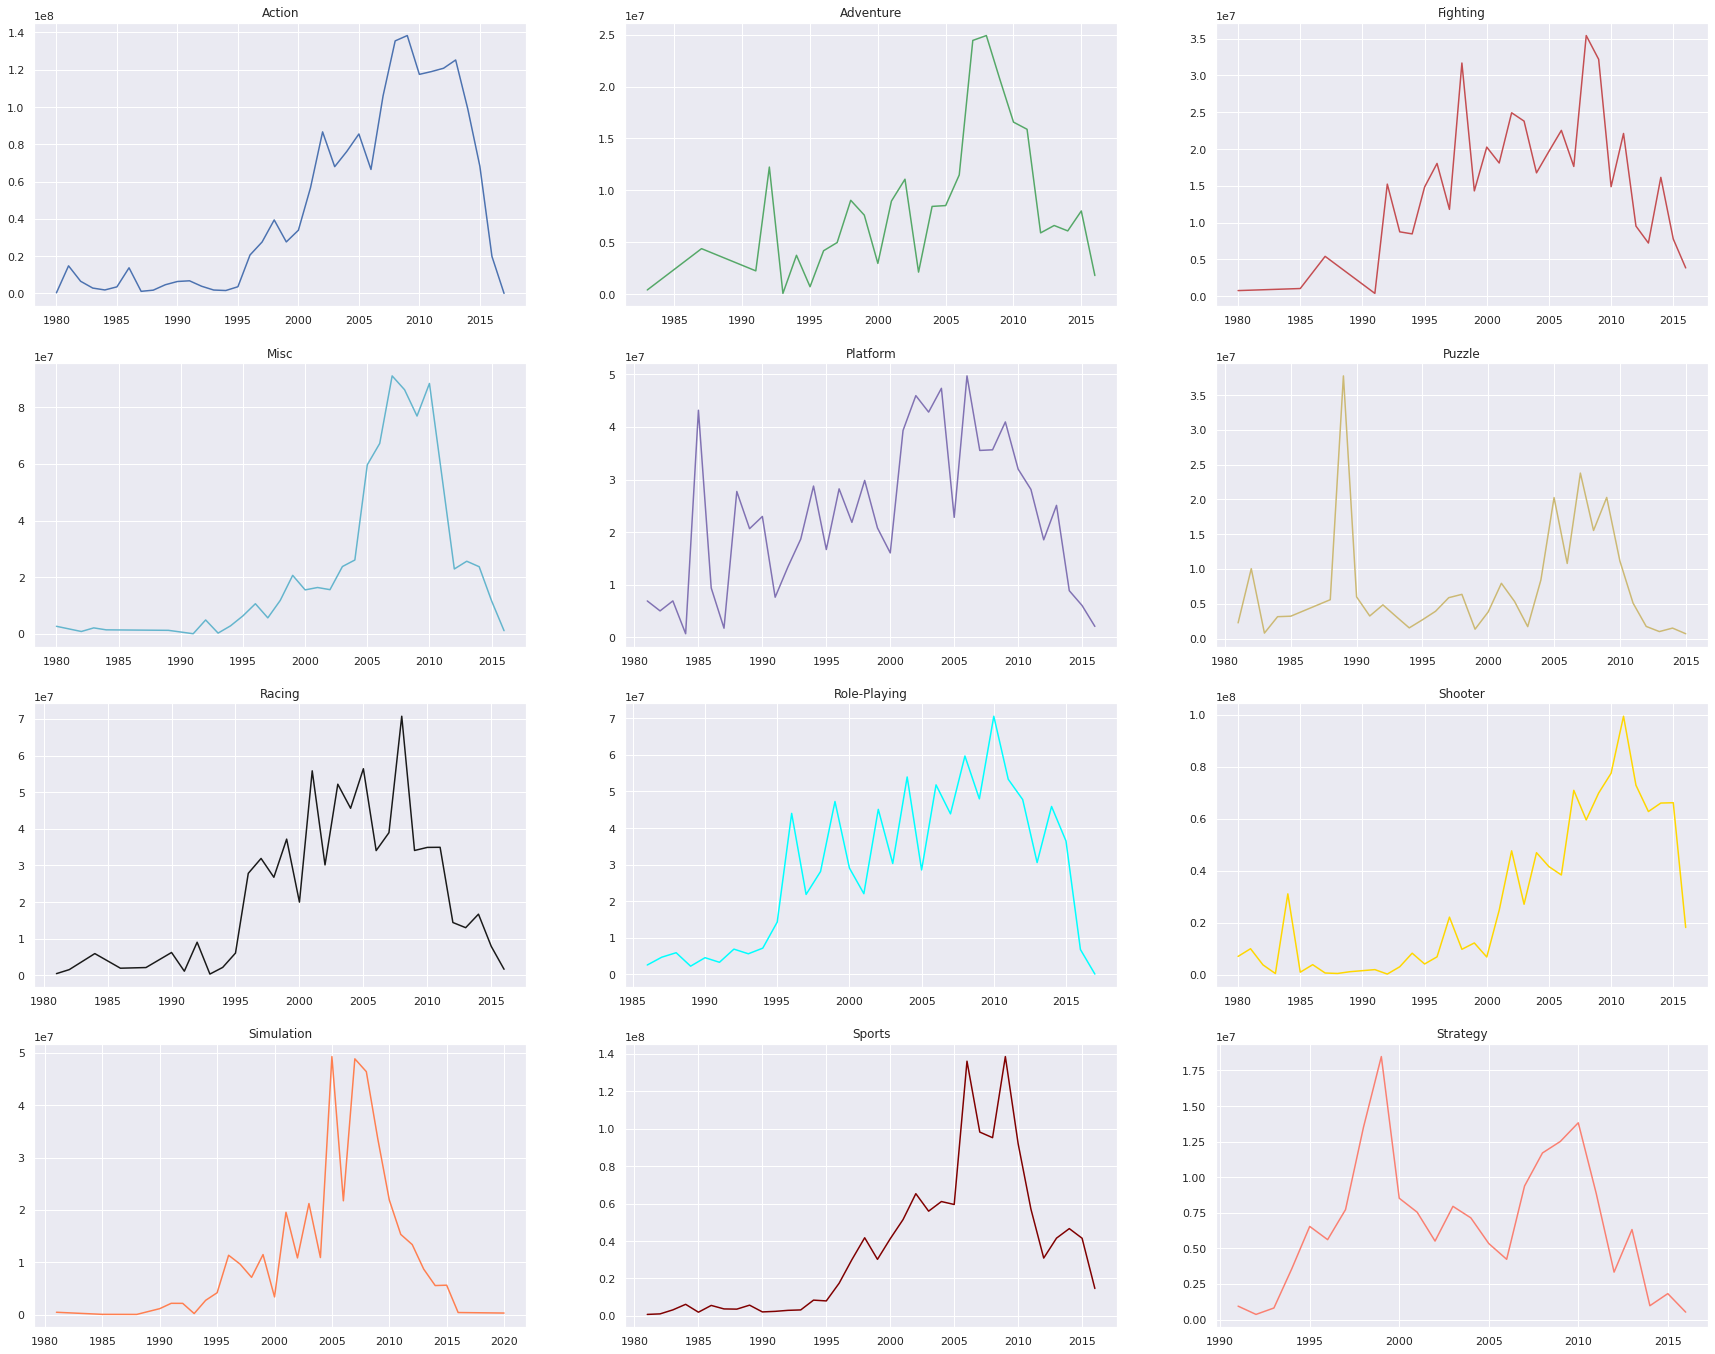

In [55]:
# 연도별 비디오 게임 장르의 트렌드
Genre_list = list(vgames2['Genre'].unique())
Genre_list.sort()

plt.figure(figsize=(30,24))

for i, gl in enumerate(Genre_list): 

    df = vgames2[vgames2['Genre'] == gl]

    df2 = df.groupby('Year')['Total_by_region'].sum()

    plt.subplot(4,3,i+1)
    plt.plot(df2, color = ytl[i])
    plt.title(gl)
plt.show()

1980년-1990년대에는 platform 장르가 트랜드임을 알 수 있습니다.

1990년-2000년대에는 Platform 장르의 판매량이 낮아졌지만 다른 여러 장르에서 전체적으로 판매량이 증가했습니다.

2000년-2010년대에는 Action, sports Shooting 장르가 급격하게 성장하여 트랜드가 되었습니다.

2010년-2020년대에는 Action, Shooter, Sport 장르가 가장 인기 있었지만 모든 비디오 게임 들이 서서히 감소하는 추세를 보이고 있습니다.

이 그래프들을 통해 연대별로 비디오 게임 장르의 트랜드가 변화한다고 예측헤 볼 수 있습니다.

In [56]:
# 연대별 비디오 게임 장르의 트랜드 변화 가설검정
start_df = vgames2[vgames2['Year'] <= 1990].groupby('Genre')['Total_by_region'].sum()
start_df['Strategy'] = 0

xc = pd.DataFrame([start_df,
                vgames2[(vgames2['Year'] > 1990)&(vgames2['Year'] <= 2000)].groupby('Genre')['Total_by_region'].sum(),
                vgames2[(vgames2['Year'] > 2000)&(vgames2['Year'] <= 2010)].groupby('Genre')['Total_by_region'].sum(),
                vgames2[(vgames2['Year'] > 2010)&(vgames2['Year'] <= 2020)].groupby('Genre')['Total_by_region'].sum()],
                index = ['1980','1990','2000','2010'])

print(stats.chi2_contingency(xc))

Chi2ContingencyResult(statistic=1441865729.9624863, pvalue=0.0, dof=33, expected_freq=array([[8.32193320e+07, 1.13690692e+07, 2.15478888e+07, 3.78790839e+07,
        4.02250900e+07, 1.16950518e+07, 3.51026447e+07, 4.37968102e+07,
        4.97840083e+07, 1.89118504e+07, 6.34155232e+07, 8.40364748e+06],
       [2.79261657e+08, 3.81515330e+07, 7.23089092e+07, 1.27112000e+08,
        1.34984564e+08, 3.92454428e+07, 1.17795018e+08, 1.46970295e+08,
        1.67061719e+08, 6.34630748e+07, 2.12805410e+08, 2.82003768e+07],
       [9.78642519e+08, 1.33697955e+08, 2.53398815e+08, 4.45450368e+08,
        4.73038926e+08, 1.37531444e+08, 4.12800005e+08, 5.15041633e+08,
        5.85449872e+08, 2.22399537e+08, 7.45753731e+08, 9.88251952e+07],
       [3.71856492e+08, 5.08014433e+07, 9.62843866e+07, 1.69258548e+08,
        1.79741420e+08, 5.22580610e+07, 1.56852333e+08, 1.95701261e+08,
        2.22454401e+08, 8.45055373e+07, 2.83365336e+08, 3.75507805e+07]]))


이것을 가설검정을 해보면 

귀무가설 : 연대와 비디오 게임 장르사이에 관련이 없다.


대립가설 : 연대와 비디오게임 장르사이에 관련이 있다.

여기서 p-value가 0.0 이 나왔으므로 귀무가설을 기각하고 대립가설을 채택합니다.

연대와 게임 장르사이에 관련이 있는 것을 알 수 있으므로 비디오게임 장르의 연도별 트랜드가 존재한다는 것을 알 수 있습니다.

# **Part 6. 최근에 인기가 많은 게임에 대한 분석**

출고량을 이용하여 최근 2015년 이후 어떤 게임이 인기 있는지 분석 했습니다.

In [57]:
# 2015년 이후 데이터
since_2015 = pd.DataFrame(vgames2[vgames2['Year'] >= 2015])
since_2015 = since_2015.reset_index(drop=True)

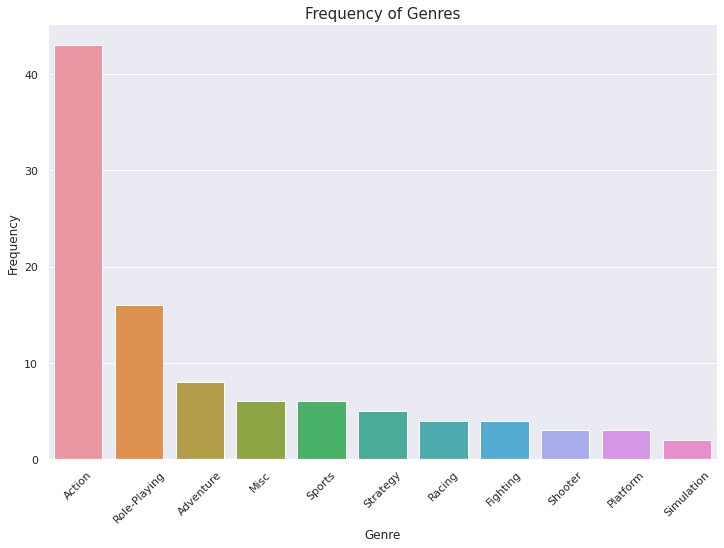

In [58]:
#최근 트랜드를 반영한 출시가 많이 되는 장르, 빈도수

# 내림차순으로 상위 100개 분석
frequency = since_2015.iloc[:100]['Genre'].value_counts()
frequency = pd.DataFrame(frequency)
frequency.reset_index(inplace = True)
frequency.columns = ['Genre', 'Frequency']

plt.figure(figsize=(12,8))

sns.barplot(x = 'Genre', y = 'Frequency', data = frequency)

plt.xticks(rotation=45)
plt.title('Frequency of Genres',fontsize=15)
plt.show()

Action, RPG, Adventure 순으로 게임 출시가 많이 된 것을 알 수 있습니다.

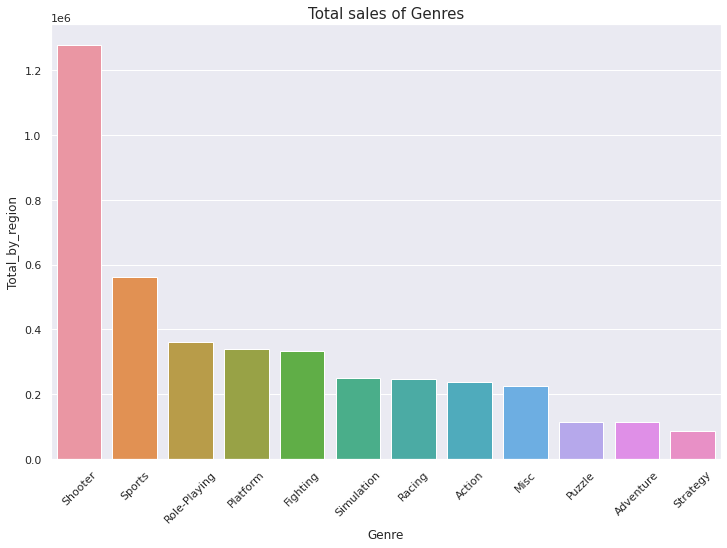

In [59]:
#최근 장르별 출고량 평균을 높은 순서대로 출력

Genre_total_trend = pd.DataFrame(since_2015.groupby('Genre')['Total_by_region'].mean())
Genre_total_trend.reset_index(inplace = True)
Genre_total_trend.sort_values(by = 'Total_by_region', ascending = False, inplace = True)

plt.figure(figsize = (12,8))

sns.barplot(x='Genre',y='Total_by_region',data=Genre_total_trend)

plt.xticks(rotation=45)
plt.title('Total sales of Genres',fontsize=15)
plt.show()

가장 많이 팔린 게임이 인기 있는 게임이라고 생각해서 최근에 가장 많이 팔린 장르를 분석해보니

이 그래프를 통해 2015년도 이후 최근까지 가장 잘 팔린 장르는 Shooter 게임인 것을 알 수 있습니다.

인기 있던 슈팅 게임의 경우
블록버스터 같은 퀼리티 높은 이야기로 스토리성을 강화하고 그래픽을 보강하여서 북미와 유럽에서 인기가 있었다고 생각합니다.

따라서 슈팅게임을 만드려고 하는데 어떤 배급사와 협업를 해야 될지 결정해야 합니다. 

# **Part 7. 협업할 배급사 찾고 분석하기**

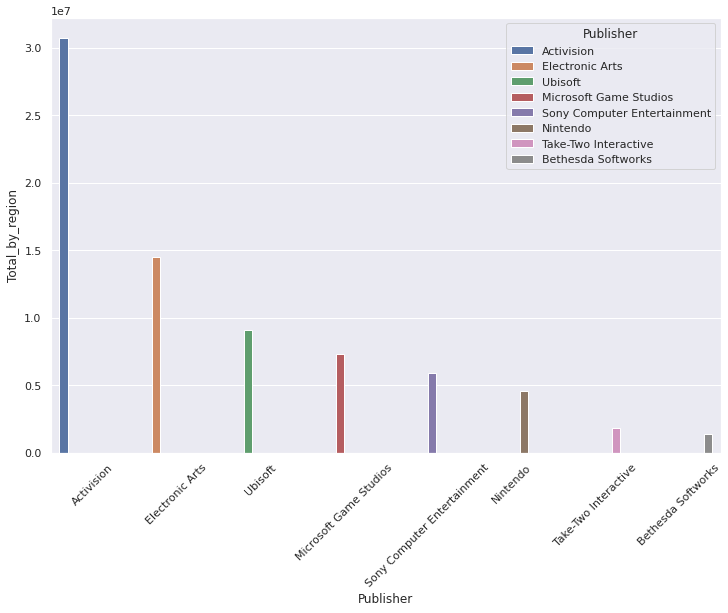

In [60]:
#shooter을 가장 잘 팔 수 있는 배급사
Toatl_top100 = since_2015.nlargest(100,columns='Total_by_region')

shooter_platform = pd.DataFrame(Toatl_top100[Toatl_top100['Genre'] == 'Shooter'].groupby('Publisher')['Total_by_region'].sum().sort_values(ascending=False))
shooter_platform.reset_index(inplace = True)

plt.figure(figsize=(12,8))

sns.barplot(x='Publisher', y='Total_by_region', data=shooter_platform, hue = 'Publisher')
plt.xticks(rotation=45)
plt.show()

다음 그래프에서 볼 수 있듯이 Activision 배급사가 shooter장르 게임을 가장 잘 판 것을 알 수 있습니다.

따라서 Activision과 협업하여 shooter장르 게임을 개발해야 하며 이를 위해

 Activision이 잘 팔리는 지역과 주로 사용하는 플랫폼, 주로 만든 게임 등 Activision에 대해 분석해 보겠습니다.

In [61]:
sh_2015= pd.DataFrame(since_2015[since_2015['Genre'] == 'Shooter'])
sh_2015 = sh_2015.reset_index(drop=True)

In [62]:
# Activision이 사용하는 Platform 2015 이후
Activision_platform = since_2015[since_2015['Publisher'] =='Activision']['Platform'].value_counts()
# Activision이 만든 Genre 2015 이후
Activision_genre = since_2015[since_2015['Publisher'] =='Activision']['Genre'].value_counts()
# Activision이 지역별 올린 매출 2015 이후
Activision_region = since_2015[since_2015['Publisher'] =='Activision'][['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
# Activision이 만든 슈팅 게임 이름 2015 이후
Activision_game = sh_2015[sh_2015['Publisher'] =='Activision']['Name'].value_counts()
# Activision의 지금 까지 매출
Activision_sales = vgames2[vgames2['Publisher'] =='Activision'].groupby('Year')['Total_by_region'].sum()

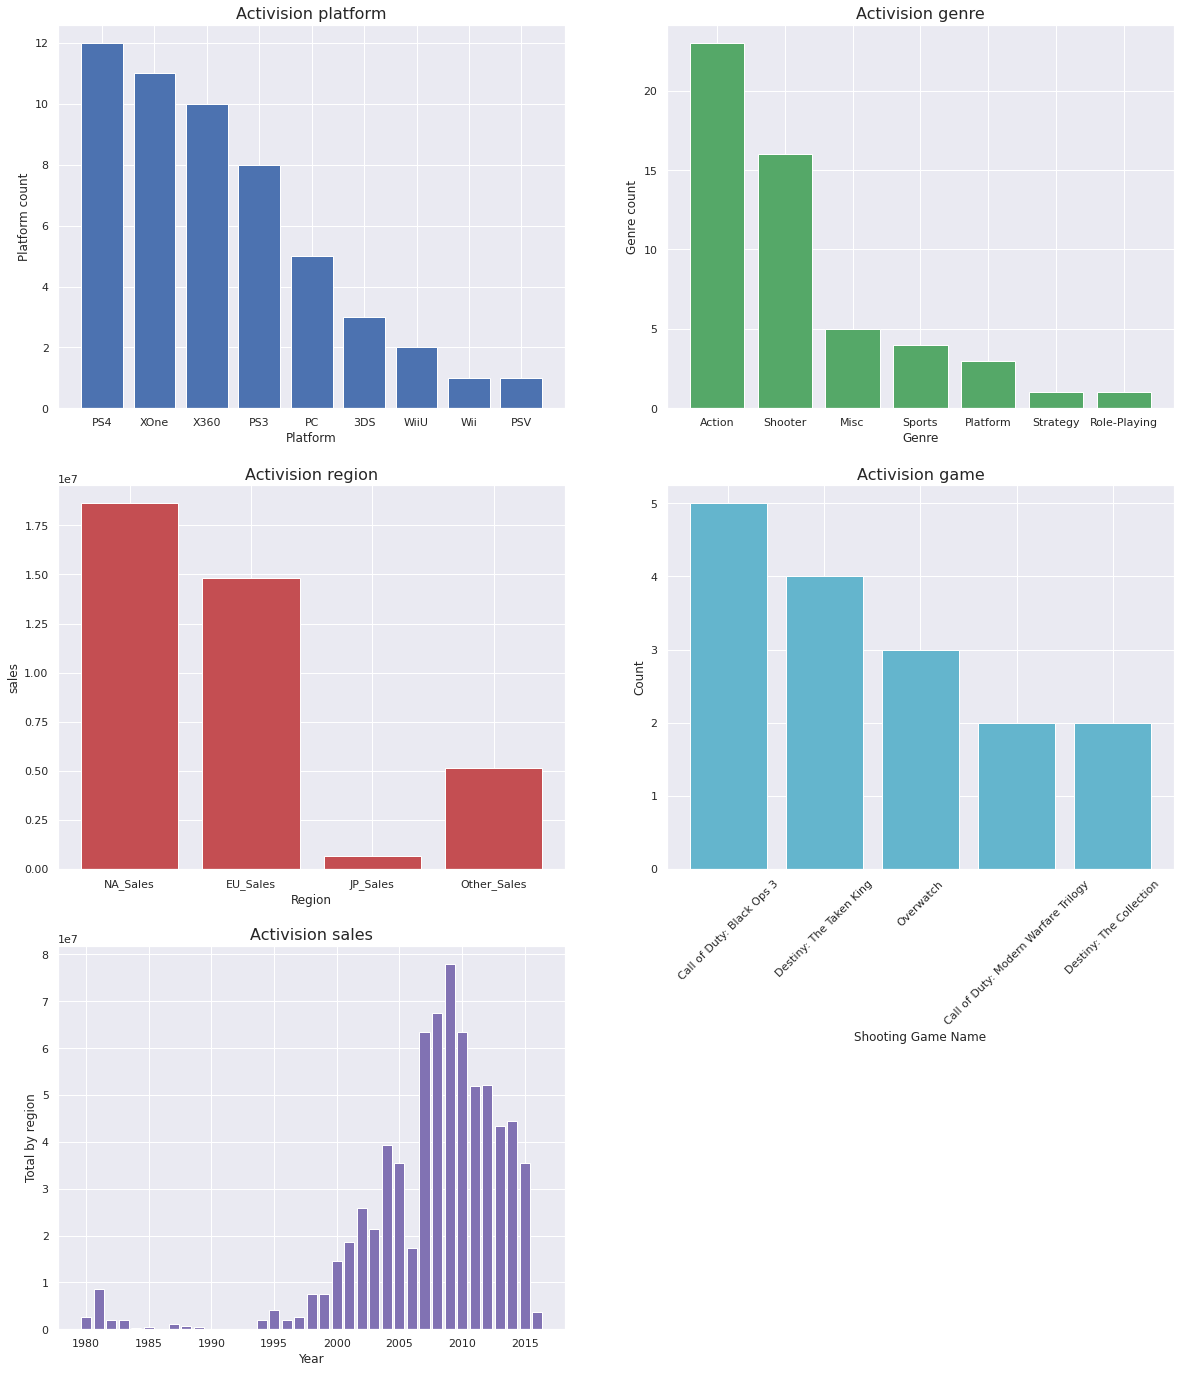

In [63]:
plt.figure(figsize=(20,24))

plt.subplot(3,2,1)
plt.bar(Activision_platform.index,Activision_platform, color = ytl[0])
plt.title('Activision platform', fontsize=16)
plt.xlabel('Platform')
plt.ylabel('Platform count')

plt.subplot(3,2,2)
plt.bar(Activision_genre.index,Activision_genre, color = ytl[1])
plt.title('Activision genre', fontsize=16)
plt.xlabel('Genre')
plt.ylabel('Genre count')

plt.subplot(3,2 ,3)
plt.bar(Activision_region.index,Activision_region, color = ytl[2])
plt.title('Activision region', fontsize=16)
plt.xlabel('Region')
plt.ylabel('sales')

plt.subplot(3,2 ,4)
plt.bar(Activision_game.index,Activision_game, color = ytl[3])
plt.title('Activision game', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Shooting Game Name')
plt.ylabel('Count')

plt.subplot(3,2 ,5)
plt.bar(Activision_sales.index,Activision_sales, color = ytl[4])
plt.title('Activision sales', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total by region')

plt.show()

Activision이 주로 사용한 플랫폼은 PS4와 XOne이고 

주로 개발하는 장르는 Action과 Shotting 입니다.

Activision의 게임이 잘 팔린 지역은 북미와 유럽지역 입니다.

또한 Shooting 장르 게임으로 콜 오브 듀티 시리즈, 데스티니 시리즈, 오버워치를 만든 것을 알 수 있습니다.

이 그래프 들의 분석을 사용해도 되는지를 알아보기 위해 2015년 이후 판매량 상위 100개의 데이터를 이용하여

두 속성 간의 관계를 검정하기 위한 이원카이제곱 검정을 통해서 게임회사와 플렛폼,장르와의 관계성 여부를 검정합니다.

In [64]:
# 게임회사와 플렛폼의 연관성을 매출 상위 100개 데이터로 분석
print('귀무가설: 게임회사와 플렛폼은 상관관계가 없다.')
print('대립가설: 게임회사와 플렛폼은 상관관계가 있다.')

cross1 = pd.crosstab(Toatl_top100['Publisher'],Toatl_top100['Platform'])

pv1 = stats.chi2_contingency(cross1)[1]
print("p-value: ", pv1)

if pv1 < 0.05:
  print("p-value가 0보다 작으므로 귀무가설을 기각한다. \n즉, 게임회사와 플렛폼은 상관관계가 있다고 판단한다.")
else:
  print("p-value가 0보다 작으므로 귀무가설을 기각하지 못한다. \n즉, 게임회사와 플렛폼은 상관관계가 없다고 판단한다.")

귀무가설: 게임회사와 플렛폼은 상관관계가 없다.
대립가설: 게임회사와 플렛폼은 상관관계가 있다.
p-value:  0.003169522036015743
p-value가 0보다 작으므로 귀무가설을 기각한다. 
즉, 게임회사와 플렛폼은 상관관계가 있다고 판단한다.


In [65]:
# 게임회사와 장르의 연관성을 매출 상위 100개 데이터로 분석
print('귀무가설: 게임회사와 장르는 상관관계가 없다.')
print('대립가설: 게임회사와 장르는 상관관계가 있다.')

cross2 = pd.crosstab(Toatl_top100['Publisher'],Toatl_top100['Genre'])

pv2 = stats.chi2_contingency(cross2)[1]
print("p-value: ", pv2)

if pv2 < 0.05:
  print("p-value가 0보다 작으므로 귀무가설을 기각한다. \n즉, 게임회사와 장르는 상관관계가 있다고 판단한다.")
else:
  print("p-value가 0보다 작으므로 귀무가설을 기각하지 못한다. \n즉, 게임회사와 장르는 상관관계가 없다고 판단한다.")

귀무가설: 게임회사와 장르는 상관관계가 없다.
대립가설: 게임회사와 장르는 상관관계가 있다.
p-value:  6.016736804130201e-14
p-value가 0보다 작으므로 귀무가설을 기각한다. 
즉, 게임회사와 장르는 상관관계가 있다고 판단한다.


이원카이제곱 검정 결과 게임회사와 플랫폼, 장르와의 상관관계에 대한 p-value가 둘다 0.05보다 작게 나왔으므로

관계성이 없다라는 귀무가설이 기각되면서 관계성이 있다는 대립가설을 채택함에 따라 

Activision을 분석한 그래프에서 보인 특징들이 통계적으로 의미 있다고 볼 수 있게 되었습니다.

# **Part 8. 결론**

- 게임회사 Activision과 협력 하여 다음 분기에 출시할 게임을 개발합니다.

- 플랫폼은 PS4와 XboxOne으로 이용 

- 출시하여 공략할 시장은 북미(NA)와 유럽(EU) 시장입니다.

- 게임의 장르는 Shooting 게임으로 Activision의 슈팅 게임 중 인기가 많았던 콜오브 듀티의 새 시리즈를 출시하는 것이 좋을 것이라고 결론 지었습니다.
